In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import imageio
from google.colab import files
from scipy.cluster.vq import kmeans
from scipy.stats import mode
from scipy.sparse import diags


In [47]:
!pip install imageio

    100% |████████████████████████████████| 3.3MB 3.0MB/s 
  Running setup.py bdist_wheel for imageio ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/e0/43/31/605de9372ceaf657f152d3d5e82f42cf265d81db8bbe63cde1
Successfully built imageio


# Task 0
Zaimplementuj algorytm K-Means. Postaraj się, żeby implementacja była efektywna, bo będzie on
w przyszłości używany do przetwarzania dużych zbiorów danych. Sprawdź działanie
zaimplementowanego algorytmu na danych IRIS. 


In [0]:
def get_distances_matrix(points_A,points_B):    
    return (-2*np.dot(points_A,points_B.T) + np.sum(points_B**2,axis=1) + np.sum(points_A**2,axis=1)[:,np.newaxis])

In [0]:
def get_closest_r(points,r_vector):
    distances = get_distances_matrix(r_vector, points).T
    return np.argmin(distances,axis=1)

In [0]:
def k_means(points, k, T = 100):
    random_vector = np.random.choice(np.arange(0,k,1),k,False)
    r_vector = points[random_vector]
    #print r_vector.shape #
    old_r_vector = r_vector
    i = 0
    arange_0_k = np.arange(0,k,1)[:,np.newaxis]
    while i <= T:
        i += 1
        closest_r = get_closest_r(points,r_vector)
        old_r_vector = r_vector.copy()
#         for i in range(k):
#             closest_point = points[closest_r == i]
#             r_vector[i] = np.mean(points[closest_r == i],axis = 0)

        indicies = arange_0_k == closest_r
        r_vector = np.dot(indicies.astype(int),points) / np.maximum(np.sum(indicies,axis=1)[:,np.newaxis],1)
        if np.all(old_r_vector == r_vector):
            break             
    return r_vector, get_closest_r(points,r_vector)                    

In [0]:
def compare_results(K, real_labels, predicted):
    same_group_predicted = 0
    naive_groups_predicted = 0
    used_groups = []
    for i in range(K):
        real_idx = real_labels == i
        moda = mode(predicted[real_idx])
        naive_groups_predicted += moda[1][0]
        if (moda[0][0] not in used_groups):            
            same_group_predicted += moda[1][0]
            used_groups.append(moda[0][0])
    return 100.0*same_group_predicted/real_labels.shape[0],100.0*naive_groups_predicted/real_labels.shape[0]

In [23]:
mode([1,2,1,2,1,1,1,3,4])

ModeResult(mode=array([1]), count=array([5]))

In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [25]:
res_my = k_means(iris.data,3)
res_my

(array([[6.85384615, 3.07692308, 5.71538462, 2.05384615],
        [5.006     , 3.418     , 1.464     , 0.244     ],
        [5.88360656, 2.74098361, 4.38852459, 1.43442623]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]))

In [26]:
compare_results(3,iris.target,res_my[1])

(88.66666666666667, 88.66666666666667)

##porównanie wyniku z funkcja z scipy

In [0]:
res_scipy = kmeans(iris.data,3)

In [28]:
get_closest_r(iris.data,res_scipy[0])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [29]:
compare_results(3,iris.target,get_closest_r(iris.data,res_scipy[0]))

(89.33333333333333, 89.33333333333333)

# Task 1
Napisz program, który generuje zbiór N = 5000 losowych wektorów danych z mieszaniny
rozkładów gaussowskich o niżej podanych parametrach i sprawdź działanie algorytmu K-Means na
tym zbiorze (rozkład Choleskiego macierzy kowariancji można w Matlabie uzyskać poleceniem
chol, a w Pythonie poleceniem cholesky).

a) d = 2, K = 5, p = 1/K \* 1, µk = 3k * 1, Σk = I (dla k = 1, 2, …, K),

b) jak w a), oprócz Σ3 = [3 0; 0 1],

c) jak w b), oprócz Σ1 = [3 1; 1 1],

d) jak w c), oprócz p = [0.2; 0.1; 0.3; 0.1; 0.3],

e) jak w a), oprócz d = 3 i Σ3 = [3 1 0; 1 1 0; 0 0 1],

f) jak w a), oprócz d = 100 i K = 10.

(1 to wektor odpowiedniej długości złożony z samych jedynek, I to macierz identycznościowa).
Jak pogrupowałbyś te dane, jeśli nie znałbyś wartości K użytej w generatorze? 


In [0]:
def generate_points(d,K,p,mi,cow,N):
    number_of_examples = np.random.choice(K,N,p)
    points = []
    for i in range(K):
        ith_class_points = np.random.multivariate_normal(mi[i],cow[i],np.sum(number_of_examples==i))
        points.append(ith_class_points)
    return points

In [31]:
np.random.choice(3,10)

array([1, 0, 0, 0, 2, 1, 1, 2, 1, 1])

In [0]:
def do_task1(d,K,p,mi,cow,bPlot=True,N=5000,debug=False):
    
    if debug:
        print "generating points....."
        
    points = generate_points(d,K,p,mi,cow,N)
    
    if debug:
        print "generated points......."
        
    flat_points = np.array([cord for classpoints in points for cord in classpoints])
    x = [coord[0] for coord in flat_points]
    y = [coord[1] for coord in flat_points]
    real_labels =np.array([elem for l in [[i]*len(z) for i,z in enumerate(points)] for elem in l])
    
    if debug:
        print "computing k_means....."
        
    result_k_means = k_means(flat_points,K)
    
    if debug:
        print "computed k_means....."
        
    comapre = compare_results(K,real_labels,result_k_means[1])
    print "Comparing results: ",comapre[0] ,"%", ' naive: ', comapre[1], '%'
    if bPlot:
        colors = cm.rainbow(np.linspace(0, 1, K))
        plt.figure(figsize=(12,8))
        plt.subplot(1,2,1)
        plt.scatter(x,y,c = [colors[i] for i in real_labels])
        plt.title('real grouping')


        
        print result_k_means[0] 
        plt.subplot(1,2,2)    
        plt.scatter(x,y,c = [colors[i] for i in result_k_means[1]])
        plt.title('k-means grouping')
        plt.show()

In [0]:
zxc = generate_points(2,2,[0.5]*2,[[0,0]]*2,[[[1,0],[0,1]]]*2,5)


In [34]:
for i,x in enumerate(zxc):
    print i, x

0 [[-0.46171635 -0.6944332 ]
 [-1.27900322 -0.92200479]
 [ 1.18925354 -0.84010796]]
1 [[-0.66215697 -0.58819542]
 [-1.04401084  2.37194765]]


Comparing results:  60.0 %  naive:  80.0 %
[[ 0.34297996 -2.36538459]
 [-0.61397249 -0.15008973]]


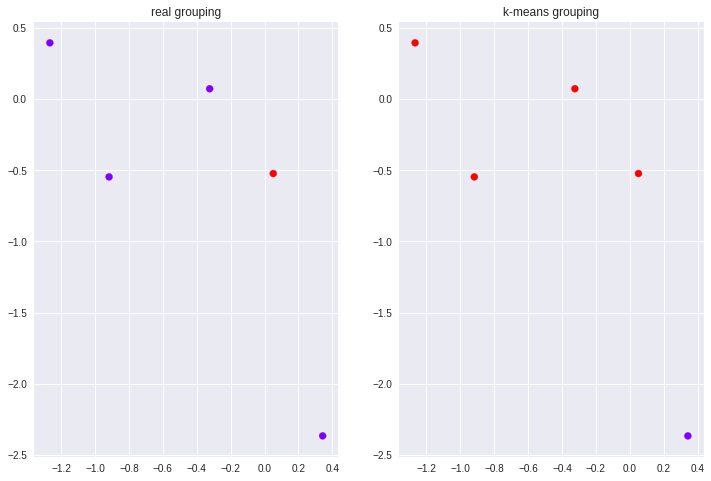

In [35]:
do_task1(2,2,[0.5]*2,[[0,0]]*2,[[[1,0],[0,1]]]*2,True,5)

## a
 d = 2, K = 5, p = 1/K * 1, µk = 3k * 1, Σk = I (dla k = 1, 2, …, K),

Comparing results:  97.12 %  naive:  97.12 %
[[ 2.98470515e+00  3.01725713e+00]
 [ 6.89488079e-03 -2.39648579e-03]
 [ 6.01419560e+00  6.00726954e+00]
 [ 1.19898464e+01  1.20242353e+01]
 [ 8.99846905e+00  8.94142147e+00]]


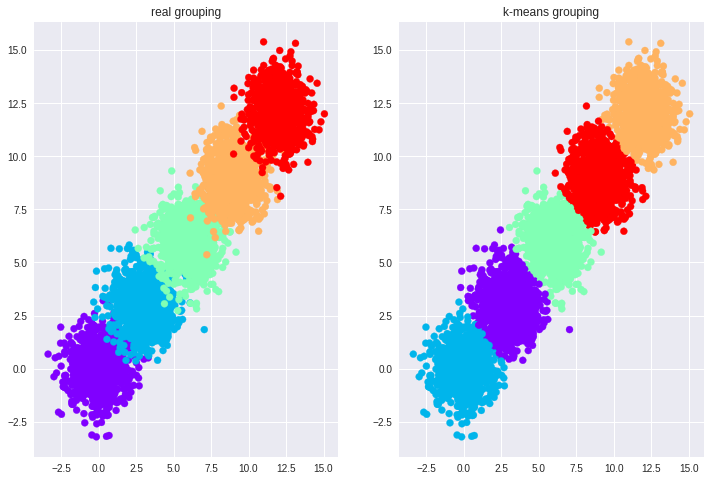

In [36]:
d = 2
K = 5
p = [0.2]*5
mi = [[3*k,3*k] for k in range(K)]
cow = [np.identity(2)]*K

do_task1(d,K,p,mi,cow)

## b
b) jak w a), oprócz Σ3 = [3 0; 0 1],


Comparing results:  95.32 %  naive:  95.32 %
[[-0.02163022 -0.03610863]
 [12.00424375 11.82878779]
 [ 2.96177815  2.96430271]
 [ 6.00345002  6.11022309]
 [ 8.9481766   8.98930003]]


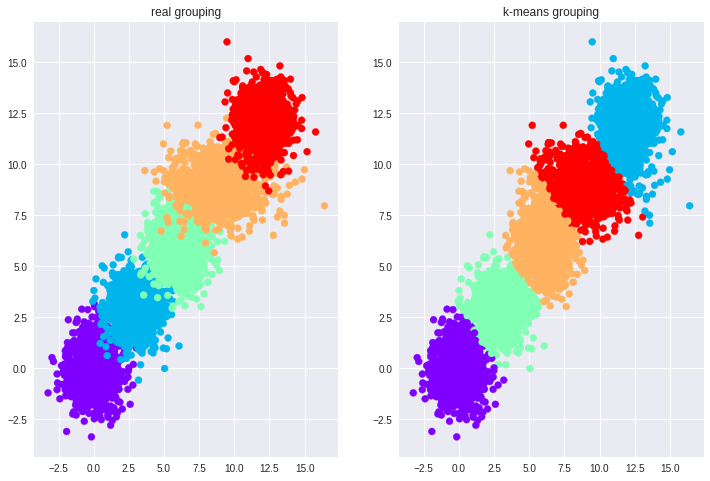

In [37]:
d = 2
K = 5
p = [0.2]*5
mi = [[3*k,3*k] for k in range(K)]
cow = [np.identity(2)]*K
cow[3] = np.array([[3,0],[0,1]])

do_task1(d,K,p,mi,cow)

## c
c) jak w b), oprócz Σ1 = [3 1; 1 1],

Comparing results:  91.3 %  naive:  91.3 %
[[12.00248955 11.81166718]
 [-0.07744968  0.15633193]
 [ 8.8741977   8.95072781]
 [ 5.97594455  5.88956054]
 [ 2.81996086  2.93750837]]


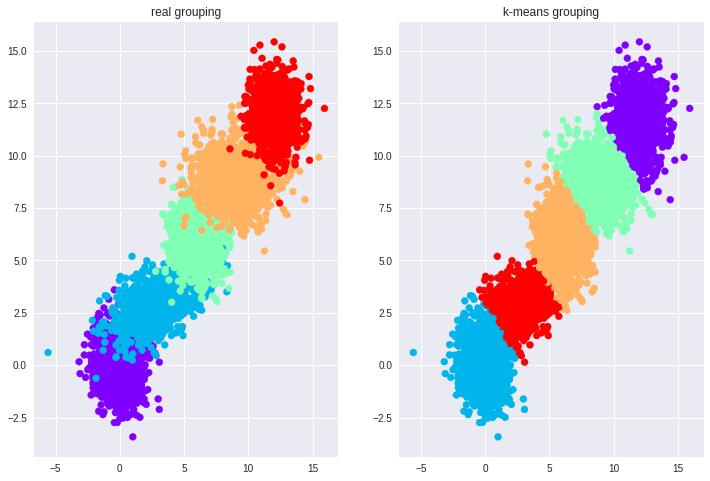

In [38]:
d = 2
K = 5
p = [0.2]*5
mi = [[3*k,3*k] for k in range(K)]
cow = [np.identity(2)]*K
cow[3] = np.array([[3,0],[0,1]])
cow[1] = np.array([[3,1],[1,1]])

do_task1(d,K,p,mi,cow)

## d
d) jak w c), oprócz p = [0.2; 0.1; 0.3; 0.1; 0.3],



Comparing results:  90.82 %  naive:  90.82 %
[[-0.02336283  0.15349125]
 [ 2.89013043  2.93673913]
 [12.0565275  11.81503998]
 [ 8.95868839  8.96554765]
 [ 5.89758694  5.89650403]]


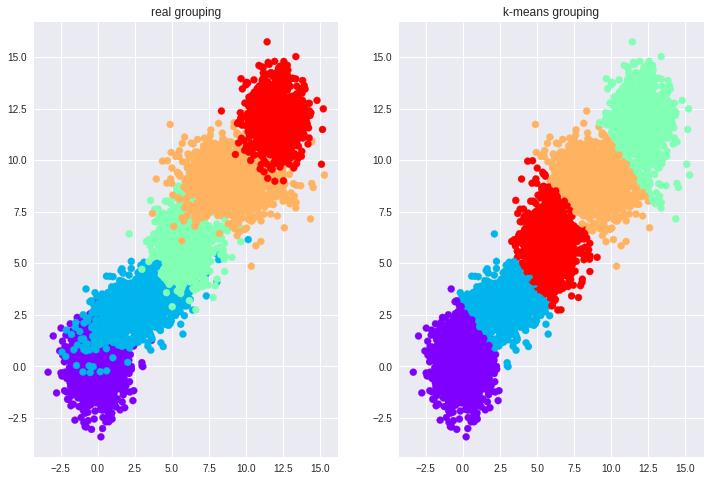

In [39]:
d = 2
K = 5
p = [0.2,0.1,0.3,0.1,0.3]
mi = [[3*k,3*k] for k in range(K)]
cow = [np.identity(2)]*K
cow[3] = np.array([[3,0],[0,1]])
cow[1] = np.array([[3,1],[1,1]])

do_task1(d,K,p,mi,cow)

## e
e) jak w a), oprócz d = 3 i Σ3 = [3 1 0; 1 1 0; 0 0 1],


In [40]:
d = 3
K = 5
p = [0.2]*5
mi = [[3*k]*d for k in range(K)]
cow = [np.identity(3)]*K
cow[3] = np.array([[3,1,0],[1,1,0],[0,0,1]])

do_task1(d,K,p,mi,cow,False)

Comparing results:  60.76 %  naive:  80.34 %


## f

f) jak w a), oprócz d = 100 i K = 10.

In [41]:
d = 100
K = 10
p = [1./K]*K
mi = [[3*k]*d for k in range(K)]
cow = [np.identity(d)]*K
do_task1(d,K,p,mi,cow,False,debug=True)

generating points.....
generated points.......
computing k_means.....
computed k_means.....
Comparing results:  43.66 %  naive:  93.24 %


# Task 2
Wygeneruj zbiór N = 1000000 losowych danych z d = 1000 wymiarowej mieszaniny K = 1000
rozkładów gaussowskich takiej, że odległość między środkami µk każdych dwóch rozkładów tej
mieszaniny jest nie mniejsza niż q = 10. Prawdopodobieństwa wyboru rozkładów mogą być równe,
p = 1/K * 1, a same rozkłady mogą mieć nieskorelowane zmienne, Σk = I. Sprawdź działanie
algorytmu K-Means na tym zbiorze. Poeksperymentuj z innymi wartościami parametru q. 


In [0]:
q = 10
N = 100000
d = 1000
K = 1000
p = [1./K]*K
mi_base = q*np.identity(K)
mi = [mi_base[i] for i in range(K)]
cow = [np.identity(d)]*K

In [0]:
#do_task1(d,K,p,mi,cow,False,N,debug=True)

In [0]:
points = generate_points(d,K,p,mi,cow,N)

        
flat_points = np.array([cord for classpoints in points for cord in classpoints])
x = np.array([coord[0] for coord in flat_points])
y = np.array([coord[1] for coord in flat_points])
real_labels =np.array([elem for l in [[i]*len(z) for i,z in enumerate(points)] for elem in l])

In [0]:
result_k_means = k_means(flat_points,K)        
comapre = compare_results(K,real_labels,result_k_means[1])

In [44]:
print "Comparing results: ",comapre[0] ,"%", ' naive: ', comapre[1], '%'

Comparing results:  9.702 %  naive:  15.238 %


In [45]:
print "abc"

abc


In [0]:
np.savetxt("flat",flat_points)
np.savetxt("x",x)
np.savetxt("y",y)
np.savetxt("real_labels",real_labels)

# Task 3

W UCI Machine Learning Repository (http://archive.ics.uci.edu/ml/) można znaleźć przykładowe
dane do testowania działania algorytmów eksploracji danych. Pobierz 5 zestawów danych (Iris,
Wine oraz 3 inne wybrane przez siebie). Zapoznaj się z opisem tych danych. Spróbuj opisać
charakterystykę tych danych. Spróbuj przedstawić te dane na wykresach. Sprawdź jak dobrze
można je pogrupować za pomocą znanych Ci algorytmów grupowania (sprawdź co najmniej KMeans)

# Task 4

Zdjęcie fotograficzne o rozdzielczości A x B w formacie RGB można traktować jako zbiór N = A * B
trójwymiarowych punktów danych. Po przeprowadzeniu grupowania takich danych, z liczbą grup K,
można obniżyć liczbę kolorów zdjęcia do K (tworząc paletę K kolorów określonych przez środki
uzyskanych grup, a następnie zastępując kolor każdego piksela najbliższym mu kolorem ze
stworzonej palety). Napisz program wczytujący zdjęcie z pliku JPG (polecenie imread w Matlabie
lub w Pythonie), redukujący liczbę kolorów w powyższy sposób i wyświetlający zredukowane
zdjęcie na ekranie. Sprawdź działanie programu na 5 wybranych przez siebie zdjęciach. 

In [0]:
files.upload()

In [0]:
def task_4(image_name, K):
    image = imageio.imread(image_name)
    N,M = image.shape[0],image.shape[1]
    image = image.reshape(N*M,3)
    
    k_mean_res = k_means(image,K)
    new_image = image.copy()
    for i in range(K):
        kth_class = k_mean_res[1] == i
        new_image[kth_class] = k_mean_res[0][i]
    imageio.imwrite('result_'+image_name ,new_image.reshape(N,M,3))
    
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plt.imshow(image.reshape(N,M,3))
    plt.title('Original image')
    
    plt.subplot(1,2,2)
    plt.imshow(new_image.reshape(N,M,3))
    
    plt.title('Image for K = '+str(K))
    plt.show()

In [0]:
def task_4_multiple_K(filename,k):
    for i in k:
        task_4(filename,i)

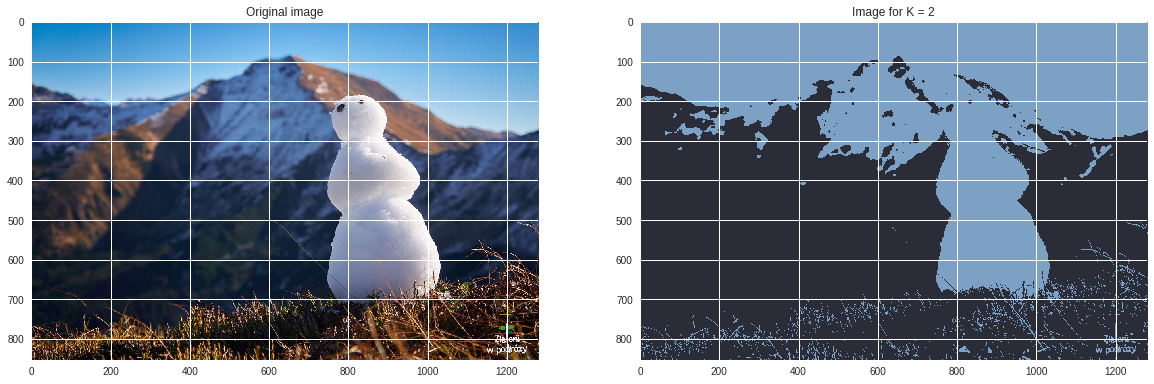

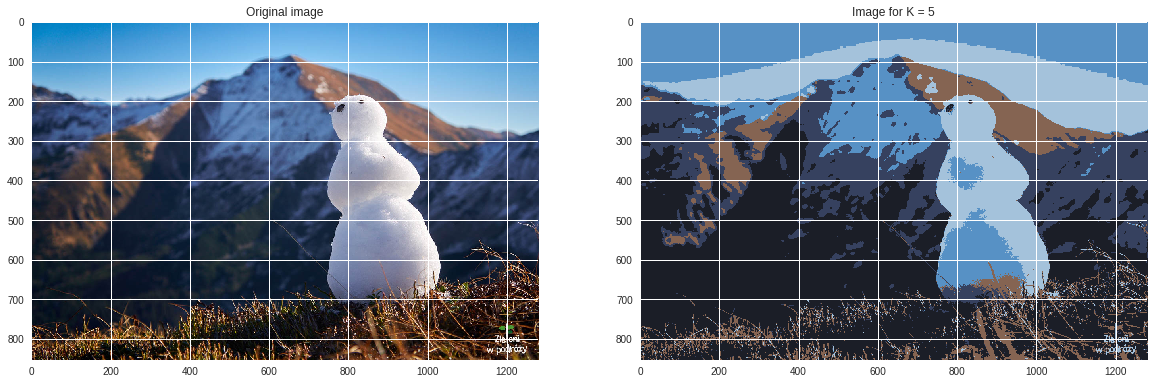

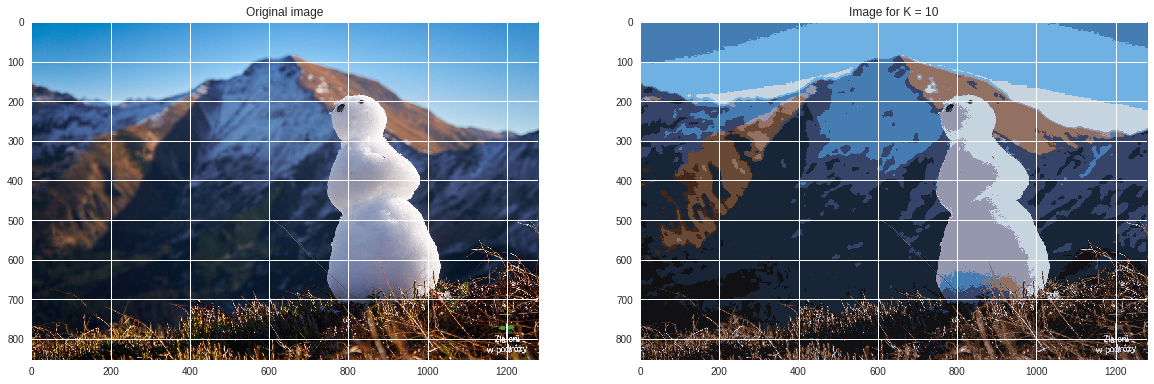

In [69]:
task_4_multiple_K('1.jpg',[2,5,10])

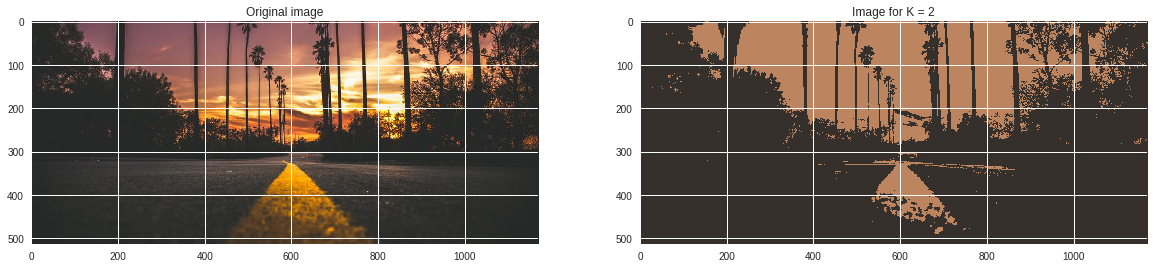

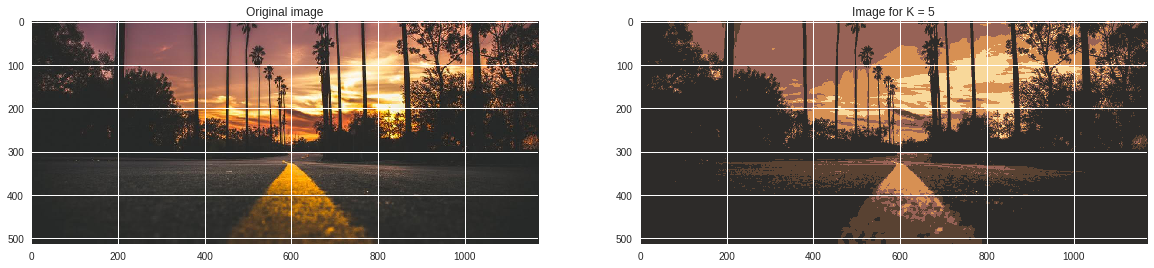

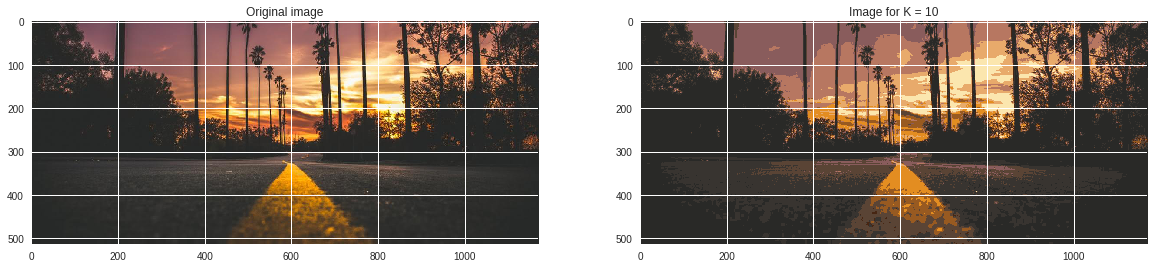

In [70]:
task_4_multiple_K('2.jpg',[2,5,10])

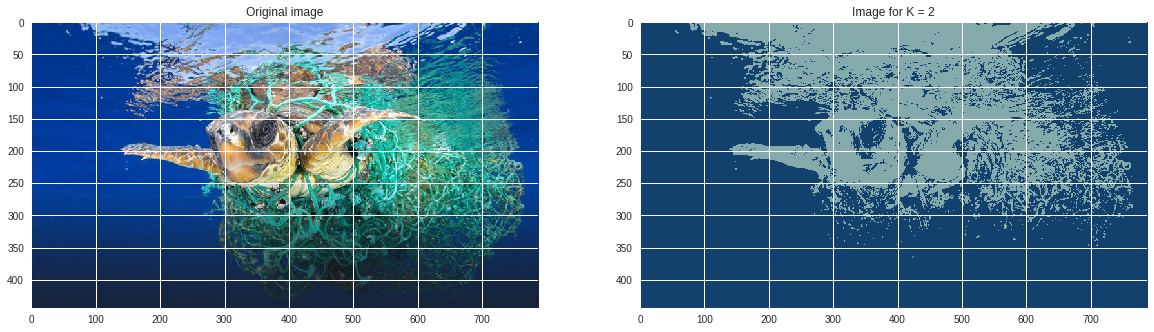

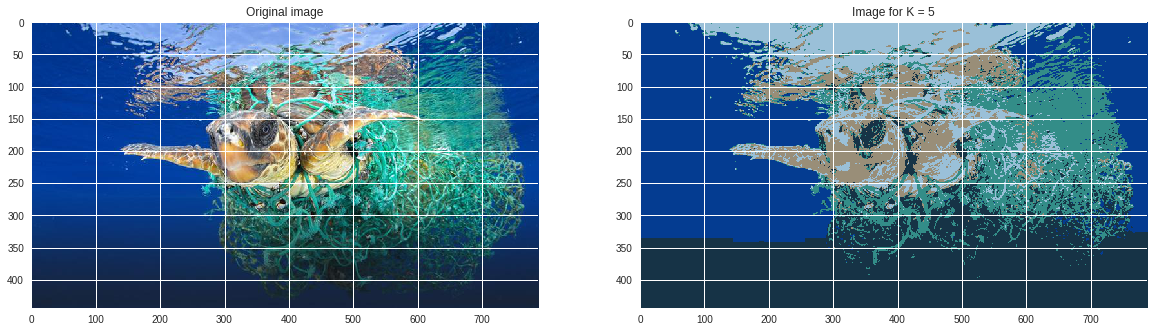

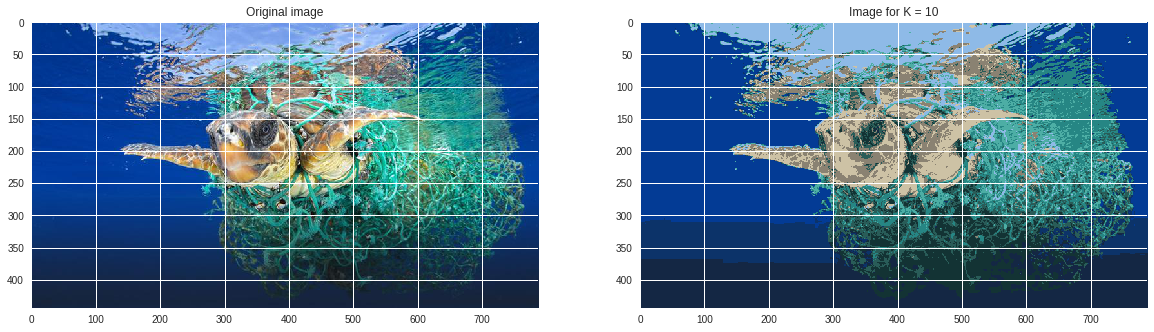

In [71]:
task_4_multiple_K('3.jpg',[2,5,10])

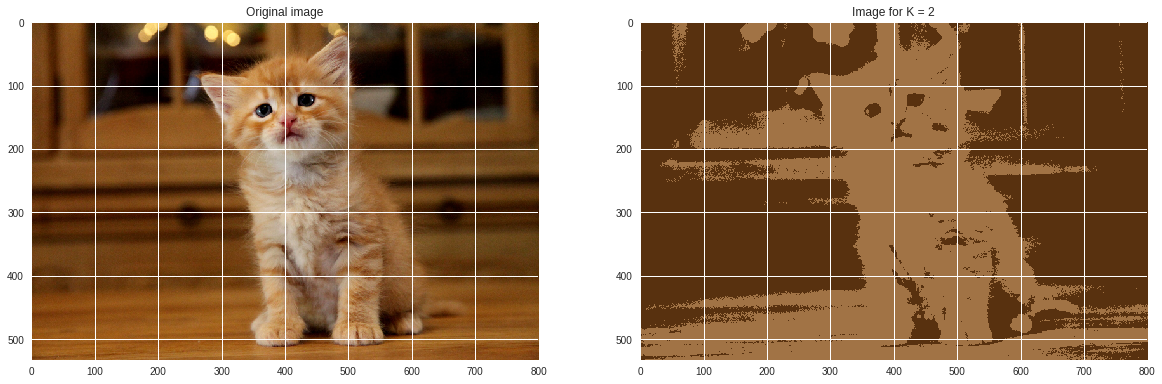

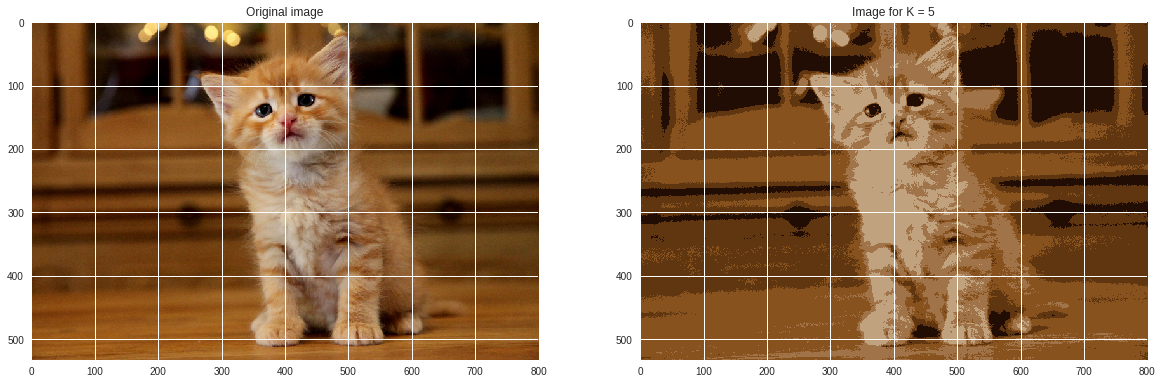

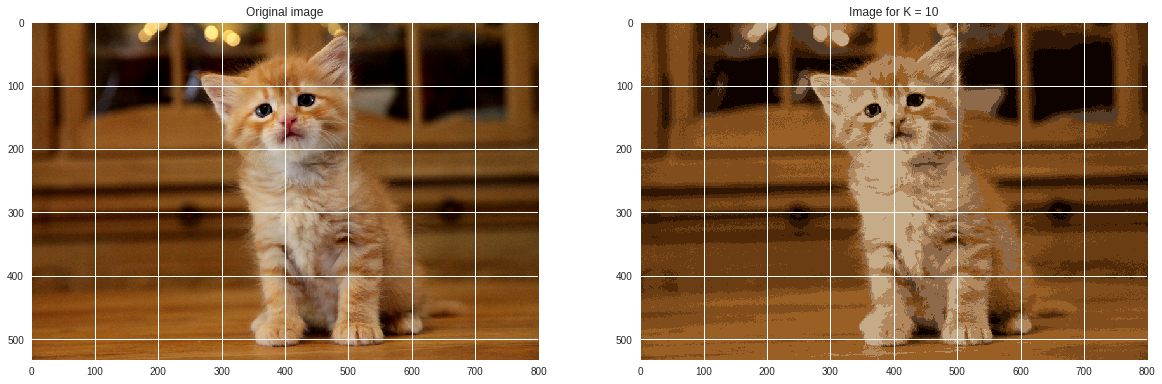

In [72]:
task_4_multiple_K('4.jpg',[2,5,10])

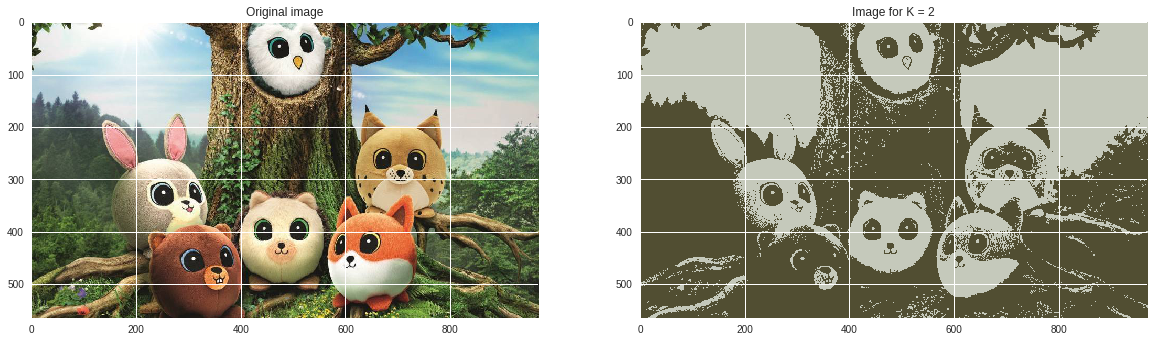

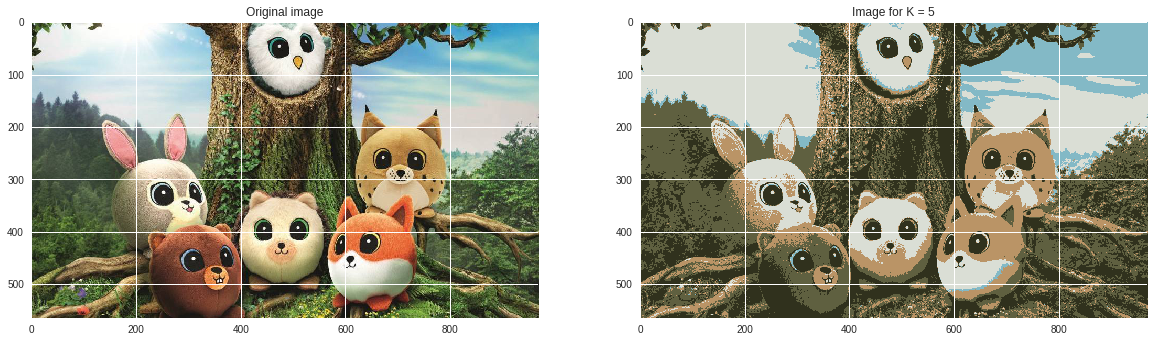

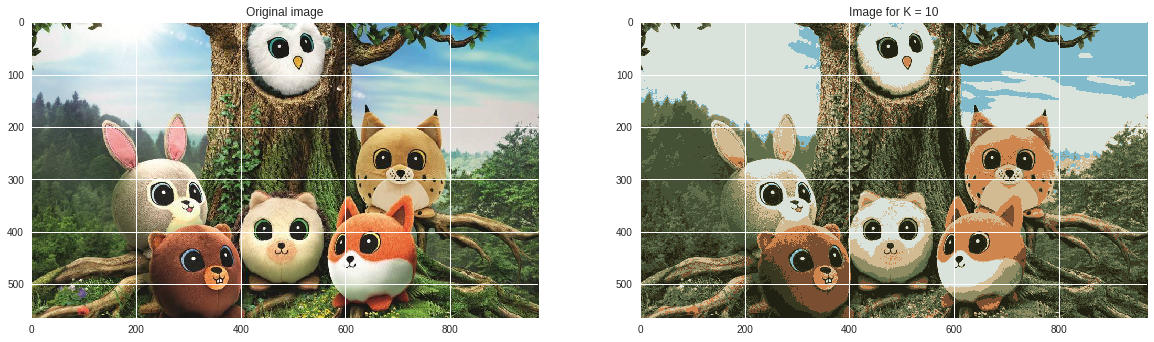

In [73]:
task_4_multiple_K('5.jpg',[2,5,10])

# Task 5

Zbiór danych Kosarak (stworzony przez Ferenca Bodona, dostępny m.in. na
http://fimi.ua.ac.be/data/kosarak.dat.gz) zawiera informacje o transakcjach zawartych w sieci 
supermarketów. Każdy wiersz tego pliku reprezentuje jedną transakcję i zawiera identyfikatory
produktów kupionych w tej transakcji.


a) Wyznacz T = 1000 najczęściej kupowanych produktów (tzn. produktów, które pojawiły się w
największej liczbie transakcji). Oznaczmy je kolejno Z1, Z2, …, ZT.


b) Dla każdego produktu, policz ile razy był on kupowany razem z produktem Zi
 (dla i =1, 2, …, T) tworząc w ten sposób wektor liczbowy p = (p1, p2, …, pT) opisujący dany produkt.
 
 
c) Pogrupuj produkty używając ich powyższej reprezentacji oraz algorytmu K-Means z różną liczbą
grup (poeksperymentuj).


Przedstaw wyniki swoich eksperymentów. Możesz także poeksperymentować z parametrem T.
Które grupy produktów można uznać za szczególnie istotne, a które za raczej przypadkowe? 